<a href="https://colab.research.google.com/github/fitshin/sql_syntax_kf_analisa/blob/main/Sales_Forecast_%26_Business_Insight_WOMart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Supplement_Sales_Forecast.csv')

# Display basic information and the first few rows of the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105885 entries, 0 to 105884
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             105885 non-null  object 
 1   Store_id       105885 non-null  int64  
 2   Store_Type     105884 non-null  object 
 3   Location_Type  105884 non-null  object 
 4   Region_Code    105884 non-null  object 
 5   Date           105884 non-null  object 
 6   Holiday        105884 non-null  float64
 7   Discount       105884 non-null  object 
 8   #Order         105884 non-null  float64
 9   Sales          105884 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 8.1+ MB


(None,
          ID  Store_id Store_Type Location_Type Region_Code        Date  \
 0  T1000001         1         S1            L3          R1  2018-01-01   
 1  T1000002       253         S4            L2          R1  2018-01-01   
 2  T1000003       252         S3            L2          R1  2018-01-01   
 3  T1000004       251         S2            L3          R1  2018-01-01   
 4  T1000005       250         S2            L3          R4  2018-01-01   
 
    Holiday Discount  #Order     Sales  
 0      1.0      Yes     9.0   7011.84  
 1      1.0      Yes    60.0  51789.12  
 2      1.0      Yes    42.0  36868.20  
 3      1.0      Yes    23.0  19715.16  
 4      1.0      Yes    62.0  45614.52  )

In [ ]:
# Clean column names
df.columns = df.columns.str.strip().str.replace('#', 'Num_').str.replace(' ', '_')

# Group by Store_Type and Location_Type to analyze average Sales and Order
grouped_store_loc = df.groupby(['Store_Type', 'Location_Type']).agg({
    'Sales': ['mean', 'sum'],
    'Num_Order': ['mean', 'sum']
}).reset_index()

# Rename columns for clarity
grouped_store_loc.columns = ['Store_Type', 'Location_Type',
                             'Avg_Sales', 'Total_Sales',
                             'Avg_Orders', 'Total_Orders']

grouped_store_loc.sort_values(by='Total_Sales', ascending=False)


,Store_Type,Location_Type,Avg_Sales,Total_Sales,Avg_Orders,Total_Orders
0,S1,L1,38916.669691,2.068343e+09,58.398077,3103741
13,S4,L2,63821.645621,2.041782e+09,107.349994,3434341
12,S4,L1,51045.334033,7.111636e+08,91.009546,1267945
2,S1,L3,34131.687590,6.340302e+08,56.496124,1049472
9,S3,L1,44592.591033,5.982542e+08,73.012299,979533
10,S3,L2,52364.790336,4.863642e+08,74.859388,695294
1,S1,L2,47732.207180,3.448175e+08,65.204873,471040
6,S2,L3,29577.584193,2.747166e+08,42.177110,391741
8,S2,L5,23742.999645,2.450278e+08,37.534690,387358
3,S1,L4,30811.759700,1.907864e+08,53.067668,328595


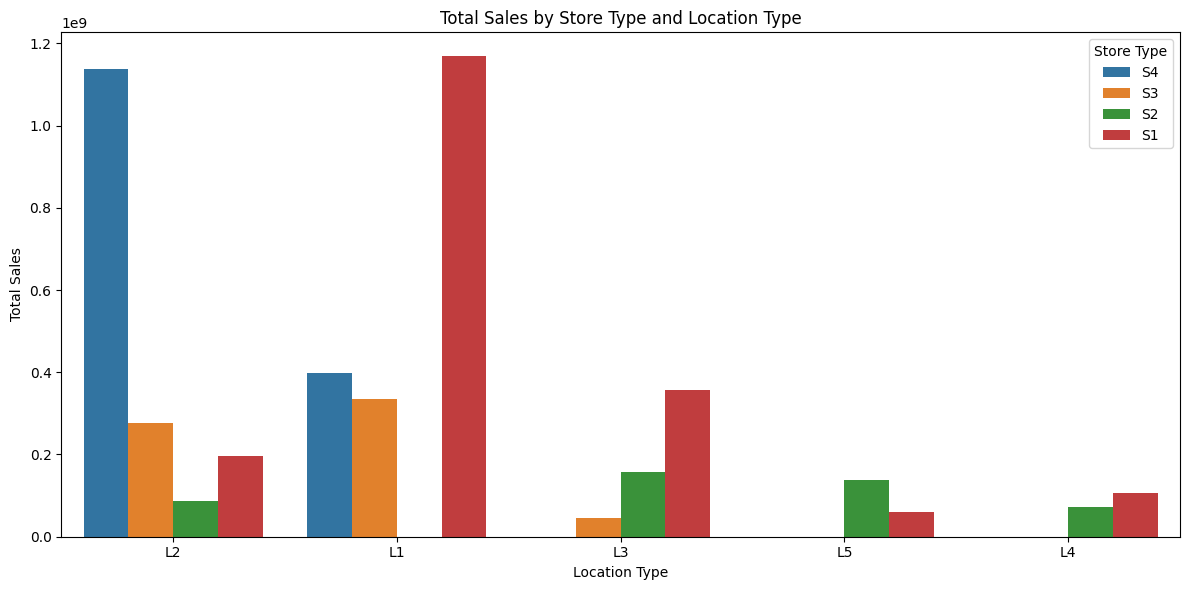

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Location_Type', y='Total_Sales', hue='Store_Type')
plt.title('Total Sales by Store Type and Location Type')
plt.ylabel('Total Sales')
plt.xlabel('Location Type')
plt.xticks(rotation=0)
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()


<ipython-input-29-7a5e779e293f>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-29-7a5e779e293f>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


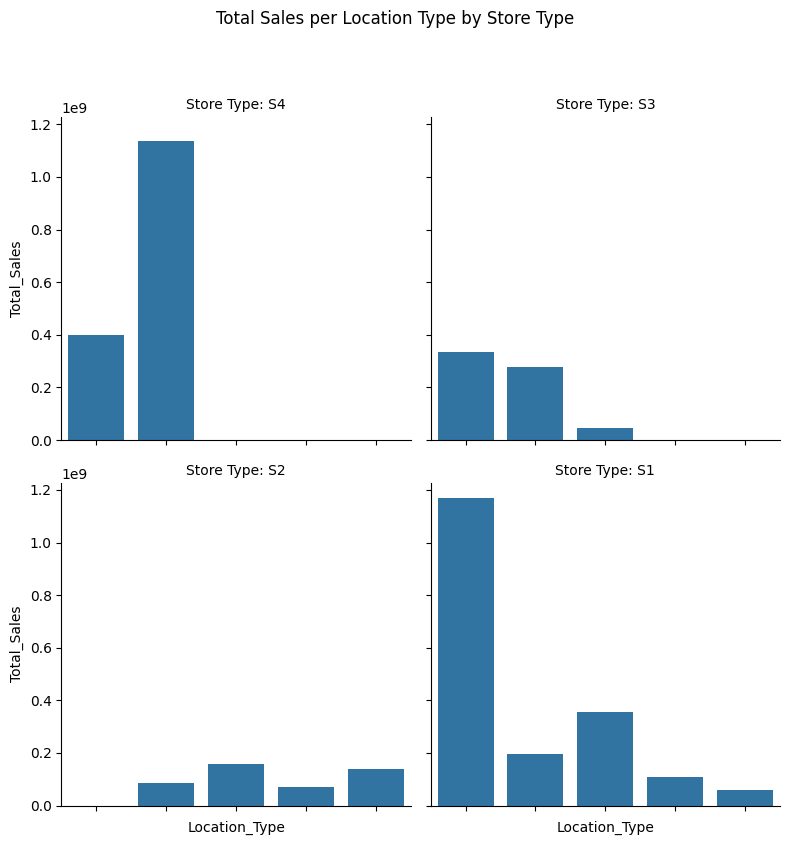

In [ ]:
g = sns.FacetGrid(df, col="Store_Type", col_wrap=2, height=4)
g.map(sns.barplot, "Location_Type", "Total_Sales", order=sorted(df['Location_Type'].unique()))
g.set_titles("Store Type: {col_name}")
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
g.fig.suptitle("Total Sales per Location Type by Store Type", y=1.05)
plt.tight_layout()
plt.show()


<ipython-input-31-ac4cfe46d7e1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Store_Location', y='Avg_Orders', palette='viridis')


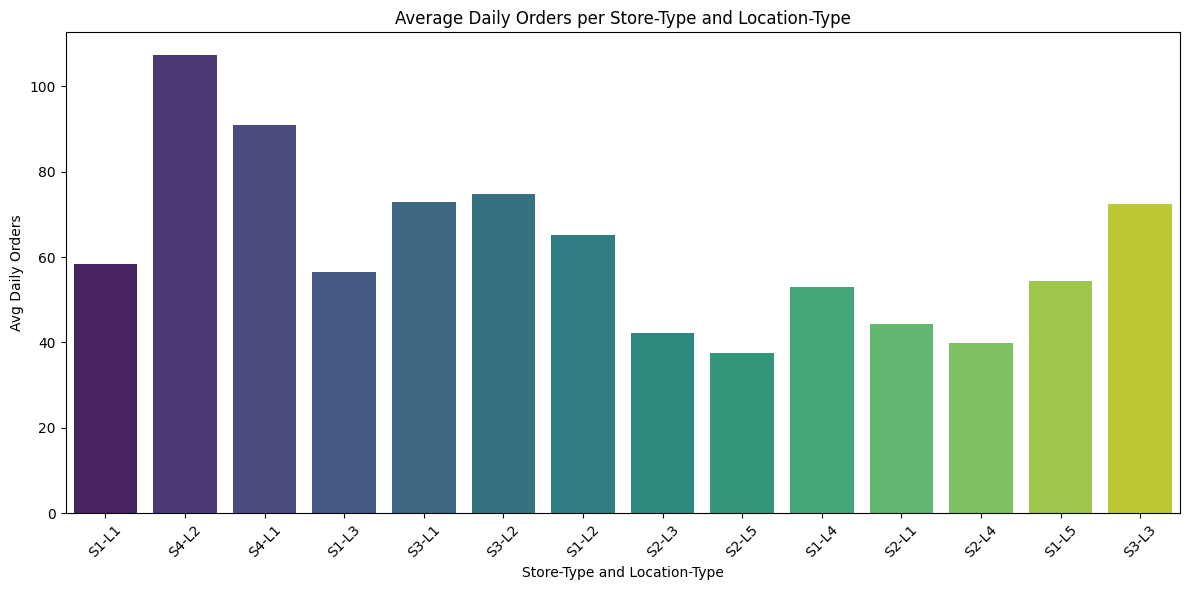

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data (dari screenshot Anda)
data = {
    'Store_Type': ['S1', 'S4', 'S4', 'S1', 'S3', 'S3', 'S1', 'S2', 'S2', 'S1', 'S2', 'S2', 'S1', 'S3'],
    'Location_Type': ['L1', 'L2', 'L1', 'L3', 'L1', 'L2', 'L2', 'L3', 'L5', 'L4', 'L1', 'L4', 'L5', 'L3'],
    'Avg_Orders': [
        58.4, 107.3, 91.0, 56.5, 73.0, 74.9, 65.2, 42.2,
        37.5, 53.1, 44.3, 39.8, 54.5, 72.5
    ]
}
df = pd.DataFrame(data)

# Gabungkan store dan location untuk jadi satu label
df['Store_Location'] = df['Store_Type'] + '-' + df['Location_Type']

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Store_Location', y='Avg_Orders', palette='viridis')

plt.title('Average Daily Orders per Store-Type and Location-Type')
plt.xlabel('Store-Type and Location-Type')
plt.ylabel('Avg Daily Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Supplement_Sales_Forecast.csv')

print(df.columns.tolist())


['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Holiday', 'Discount', '#Order', 'Sales']


In [ ]:
# Pastikan kolom tidak ada spasi/karakter aneh
df.columns = df.columns.str.strip()

# Hitung total sales berdasarkan ada/tidaknya diskon
sales_comparison = df.groupby('Discount')['Sales'].sum().reset_index()

# Tampilkan hasil
print(sales_comparison)


  Discount         Sales
0       No  3.891890e+09
1      Yes  4.166110e+09


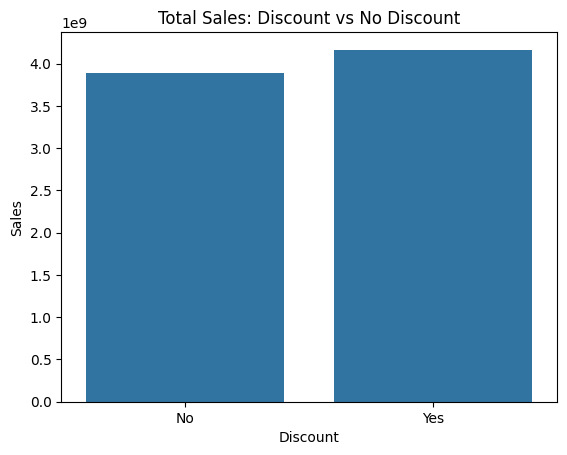

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=sales_comparison, x='Discount', y='Sales')
plt.title('Total Sales: Discount vs No Discount')
plt.show()


In [ ]:
# Hitung avg sales per order untuk tiap kategori diskon
avg_sales_per_order = df.groupby('Discount').apply(lambda x: x['Sales'].sum() / x['#Order'].sum()).reset_index(name='Avg_Sales_per_Order')

print(avg_sales_per_order)


  Discount  Avg_Sales_per_Order
0       No           605.177284
1      Yes           649.445952


<ipython-input-45-2c75e1566c4e>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_sales_per_order = df.groupby('Discount').apply(lambda x: x['Sales'].sum() / x['#Order'].sum()).reset_index(name='Avg_Sales_per_Order')


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Contoh: df sudah tersedia dan memuat kolom ['Discount', 'Sales', 'Orders']
df = pd.read_csv('/content/Supplement_Sales_Forecast.csv')

# Hitung total dan rata-rata per kategori diskon
summary = df.groupby('Discount').agg(
    Total_Penjualan=('Sales', 'sum'),
    Rata_rata_Penjualan=('Sales', 'mean'),
    Total_Order=('#Order', 'sum'),
    Rata_rata_Order=('#Order', 'mean')
).reset_index()

# Format angka (biar tampilannya sesuai gambar kamu)
summary['Rata_rata_Penjualan'] = summary['Rata_rata_Penjualan'].apply(lambda x: f"Rp {x:,.0f}".replace(",", "."))
summary['Total_Penjualan'] = summary['Total_Penjualan'].apply(lambda x: f"Rp {x/1e9:.2f} Miliar")
summary['Rata_rata_Order'] = summary['Rata_rata_Order'].apply(lambda x: f"{x:.2f} order/hari")
summary['Total_Order'] = summary['Total_Order'].apply(lambda x: f"{x/1e6:.2f} juta")

# Visualisasi sebagai tabel
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Diskon", "Rata-rata Penjualan", "Total Penjualan", "Rata-rata Order", "Total Order"],
        fill_color='paleturquoise',
        align='left'
    ),
    cells=dict(
        values=[
            summary['Discount'],
            summary['Rata_rata_Penjualan'],
            summary['Total_Penjualan'],
            summary['Rata_rata_Order'],
            summary['Total_Order']
        ],
        fill_color='lavender',
        align='left'
    )
)])

fig.update_layout(title="Perbandingan Penjualan: Diskon vs Non-Diskon")
fig.show()


<ipython-input-6-9bafbb33e90b>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-6-9bafbb33e90b>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-6-9bafbb33e90b>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-6-9bafbb33e90b>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




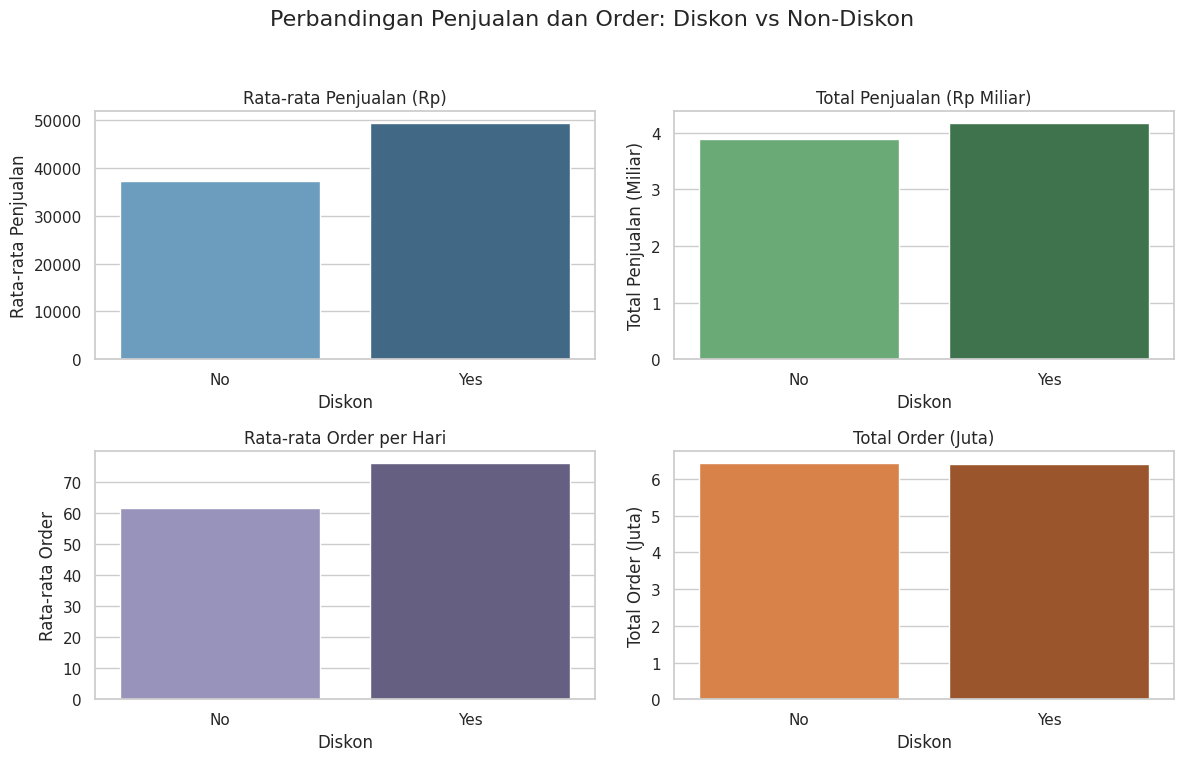

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat dataframe berdasarkan tabel
data = {
    'Diskon': ['No', 'Yes'],
    'Rata-rata Penjualan': [37404, 49426],
    'Total Penjualan (Miliar)': [3.89, 4.17],
    'Rata-rata Order': [61.81, 76.11],
    'Total Order (Juta)': [6.43, 6.41]
}

df_diskon = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Buat subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Perbandingan Penjualan dan Order: Diskon vs Non-Diskon", fontsize=16)

# Plot 1: Rata-rata Penjualan
sns.barplot(x='Diskon', y='Rata-rata Penjualan', data=df_diskon, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title('Rata-rata Penjualan (Rp)')

# Plot 2: Total Penjualan
sns.barplot(x='Diskon', y='Total Penjualan (Miliar)', data=df_diskon, ax=axs[0, 1], palette="Greens_d")
axs[0, 1].set_title('Total Penjualan (Rp Miliar)')

# Plot 3: Rata-rata Order
sns.barplot(x='Diskon', y='Rata-rata Order', data=df_diskon, ax=axs[1, 0], palette="Purples_d")
axs[1, 0].set_title('Rata-rata Order per Hari')

# Plot 4: Total Order
sns.barplot(x='Diskon', y='Total Order (Juta)', data=df_diskon, ax=axs[1, 1], palette="Oranges_d")
axs[1, 1].set_title('Total Order (Juta)')

# Layout rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


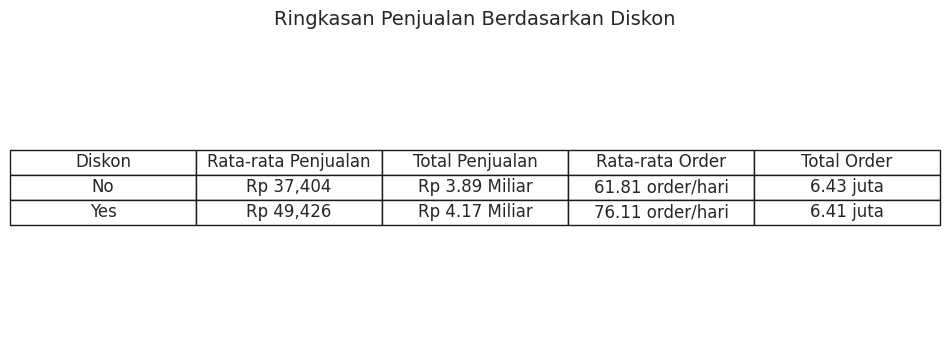

In [ ]:
import pandas as pd

# Contoh asumsi struktur awal df
# df.head()

# Hitung metrik diskon
summary = df.groupby('Discount').agg({
    'Sales': ['mean', 'sum'],
    '#Order': ['mean', 'sum']
}).reset_index()

# Rename kolom untuk kemudahan
summary.columns = ['Diskon', 'Rata-rata Penjualan', 'Total Penjualan', 'Rata-rata Order', 'Total Order']

# Format ulang angka
summary['Rata-rata Penjualan'] = summary['Rata-rata Penjualan'].round(0).apply(lambda x: f"Rp {x:,.0f}")
summary['Total Penjualan'] = summary['Total Penjualan'].apply(lambda x: f"Rp {x/1e9:.2f} Miliar")
summary['Rata-rata Order'] = summary['Rata-rata Order'].round(2).apply(lambda x: f"{x} order/hari")
summary['Total Order'] = summary['Total Order'].apply(lambda x: f"{x/1e6:.2f} juta")

# Tampilkan hasil
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(
    cellText=summary.values,
    colLabels=summary.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
plt.title("Ringkasan Penjualan Berdasarkan Diskon", fontsize=14)
plt.show()
